## 1.0 Setting the environment

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.svm import SVR
from sklearn import metrics

import os
import warnings
warnings.filterwarnings('ignore')

#Setting styles and aesthetics
pd.options.display.max_columns =200
pd.options.display.max_rows =30
pd.options.display.float_format = '{:,.2f}'.format

## 1.2 Loading the dataset

In [3]:
initial_data = pd.read_csv('./OUTPUT_WBI_exposer_cyclones_v7.csv',sep=',')

In [4]:
initial_data.head(3)

,Unnamed: 0,SID,NAME,ISO,YEAR,BASIN,SUB BASIN,NATURE,ISO_TIME,COORDS,TOTAL_HRS,DAY_HRS,NIGHT_HRS,USA_SSHS,WIND_CAL_MIN,WIND_CAL_MAX,WIND_CALC_MEAN,PRES_CAL_MIN,PRES_CAL_MAX,PRES_CALC_MEAN,STORM_SPD_MIN,STORM_SPD_MAX,STORM_SPD_MEAN,STORM_DR_MIN,STORM_DR_MAX,STORM_DR_MEAN,V_LAND_KN,34KN_ASSETS,64KN_ASSETS,96KN_ASSETS,CPI,TOTAL_DAMAGE_(000$),TOTAL_DEATHS,"Air transport, freight (million ton-km)",Arable land (hectares per person),Cereal yield (kg per hectare),Food production index (2004-2006 = 100),GDP growth (annual %),GDP per capita (constant 2010 US$),Net flows from UN agencies US$,"Life expectancy at birth, total (years)",Mobile cellular subscriptions (per 100 people),Population density (people per sq. km of land area),Adjusted savings: education expenditure (% of GNI),Rural population (% of total population),Income_level_Final,pop_max_34,pop_max_50,pop_max_64,TOTAL_AFFECTED,pop_max_34_adj,pop_max_50_adj,pop_max_64_adj
0,0,1949163N07145,DELLA,JPN,1949,WP,WP,TS,"['1949-06-21 03:00:00', '1949-06-22 03:00:00',...","[[35.67, 130.99], [38.35, 135.07], [38.82, 136...",0,0,0,0,33.00,55.00,39.13,982.00,"1,008.00","1,000.33",11,27,19.00,41,356,91.44,99.82,nan,nan,nan,9.33,nan,419.00,nan,0.06,"4,173.50",67.79,nan,"8,607.66",0.00,67.67,nan,258.91,2.87,36.73,Low,"16,278,929.00","4,378,623.50","732,154.81",194046,0,0,0
1,1,1950241N23140,JANE,JPN,1950,WP,WP,ET,"['1950-09-02 18:00:00', '1950-09-03 12:00:00',...","[[31.71, 134.12], [38.48, 137.98], [46.7, 152.8]]",6,0,6,-1,55.60,97.20,76.40,947.50,"1,000.00",974.83,17,30,23.00,13,66,37.67,99.82,nan,nan,nan,9.43,nan,509.00,nan,0.06,"4,173.50",67.79,nan,"8,607.66",0.00,67.67,nan,258.91,2.87,36.73,Low,"39,024,004.00","14,551,006.00","4,093,306.50",642117,0,0,0
2,2,1951224N12316,CHARLIE,JAM,1951,NAm,CS,TS,"['1951-08-17 21:00:00', '1951-08-18 12:00:00']","[[17.34, -75.41], [18.3, -79.4]]",15,0,15,1,75.00,102.00,88.50,972.00,977.00,974.50,15,16,15.50,279,288,283.50,132.40,"21,481,978,182.00","21,481,978,182.00","19,483,462,361.00",10.18,"56,000.00",154.00,nan,0.10,868.30,69.93,nan,"3,796.22",0.00,64.77,nan,152.45,2.58,66.23,Low,"2,753,687.50","2,606,976.50","1,067,878.50",20200,0,0,0


Trying to estimate the Affected population alone, So removing some features

In [5]:
initial_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 53 columns):
Unnamed: 0                                             1044 non-null int64
SID                                                    1044 non-null object
NAME                                                   1044 non-null object
ISO                                                    1044 non-null object
YEAR                                                   1044 non-null int64
BASIN                                                  1044 non-null object
SUB BASIN                                              1044 non-null object
NATURE                                                 1044 non-null object
ISO_TIME                                               1044 non-null object
COORDS                                                 1044 non-null object
TOTAL_HRS                                              1044 non-null int64
DAY_HRS                                                1044 

## 1.3 Data Preparation

In [6]:
req_columns = ['YEAR','BASIN','SUB BASIN','NATURE','TOTAL_HRS','USA_SSHS','ISO_TIME',
              'WIND_CAL_MIN','WIND_CAL_MAX','WIND_CALC_MEAN','PRES_CAL_MIN','PRES_CAL_MAX',
              'PRES_CALC_MEAN','STORM_SPD_MIN','STORM_SPD_MAX','STORM_SPD_MEAN','STORM_DR_MIN',
              'STORM_DR_MAX','STORM_DR_MEAN','V_LAND_KN',
               'Population density (people per sq. km of land area)',
              'Rural population (% of total population)','TOTAL_AFFECTED']

In [7]:
data = initial_data[req_columns]
data.head(3)

,YEAR,BASIN,SUB BASIN,NATURE,TOTAL_HRS,USA_SSHS,ISO_TIME,WIND_CAL_MIN,WIND_CAL_MAX,WIND_CALC_MEAN,PRES_CAL_MIN,PRES_CAL_MAX,PRES_CALC_MEAN,STORM_SPD_MIN,STORM_SPD_MAX,STORM_SPD_MEAN,STORM_DR_MIN,STORM_DR_MAX,STORM_DR_MEAN,V_LAND_KN,Population density (people per sq. km of land area),Rural population (% of total population),TOTAL_AFFECTED
0,1949,WP,WP,TS,0,0,"['1949-06-21 03:00:00', '1949-06-22 03:00:00',...",33.00,55.00,39.13,982.00,"1,008.00","1,000.33",11,27,19.00,41,356,91.44,99.82,258.91,36.73,194046
1,1950,WP,WP,ET,6,-1,"['1950-09-02 18:00:00', '1950-09-03 12:00:00',...",55.60,97.20,76.40,947.50,"1,000.00",974.83,17,30,23.00,13,66,37.67,99.82,258.91,36.73,642117
2,1951,NAm,CS,TS,15,1,"['1951-08-17 21:00:00', '1951-08-18 12:00:00']",75.00,102.00,88.50,972.00,977.00,974.50,15,16,15.50,279,288,283.50,132.40,152.45,66.23,20200


Extract Month as the cyclone can have seasonal preference

In [8]:
data['MONTH'] = data['ISO_TIME'].apply(lambda x: [int(i[5:7]) for i in eval(x)][0])
data.drop('ISO_TIME', axis=1, inplace=True)

In [9]:
data.head(3)

,YEAR,BASIN,SUB BASIN,NATURE,TOTAL_HRS,USA_SSHS,WIND_CAL_MIN,WIND_CAL_MAX,WIND_CALC_MEAN,PRES_CAL_MIN,PRES_CAL_MAX,PRES_CALC_MEAN,STORM_SPD_MIN,STORM_SPD_MAX,STORM_SPD_MEAN,STORM_DR_MIN,STORM_DR_MAX,STORM_DR_MEAN,V_LAND_KN,Population density (people per sq. km of land area),Rural population (% of total population),TOTAL_AFFECTED,MONTH
0,1949,WP,WP,TS,0,0,33.00,55.00,39.13,982.00,"1,008.00","1,000.33",11,27,19.00,41,356,91.44,99.82,258.91,36.73,194046,6
1,1950,WP,WP,ET,6,-1,55.60,97.20,76.40,947.50,"1,000.00",974.83,17,30,23.00,13,66,37.67,99.82,258.91,36.73,642117,9
2,1951,NAm,CS,TS,15,1,75.00,102.00,88.50,972.00,977.00,974.50,15,16,15.50,279,288,283.50,132.40,152.45,66.23,20200,8


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 23 columns):
YEAR                                                   1044 non-null int64
BASIN                                                  1044 non-null object
SUB BASIN                                              1044 non-null object
NATURE                                                 1044 non-null object
TOTAL_HRS                                              1044 non-null int64
USA_SSHS                                               1044 non-null int64
WIND_CAL_MIN                                           1044 non-null float64
WIND_CAL_MAX                                           1044 non-null float64
WIND_CALC_MEAN                                         1040 non-null float64
PRES_CAL_MIN                                           1044 non-null float64
PRES_CAL_MAX                                           1044 non-null float64
PRES_CALC_MEAN                                         

In [11]:
data['USA_SSHS'] = data['USA_SSHS'].replace(-5, np.nan)

In [12]:
data.pivot_table(values='TOTAL_AFFECTED', index='BASIN')

,TOTAL_AFFECTED
BASIN,
EP,"60,896.74"
NAm,"302,653.68"
NI,"1,661,711.52"
SI,"173,846.07"
SP,"42,685.87"
WP,"782,759.17"


In [13]:
data.pivot_table(values='TOTAL_AFFECTED', index='SUB BASIN')

,TOTAL_AFFECTED
SUB BASIN,
AS,"60,165.23"
BB,"2,432,826.41"
CP,"14,083.50"
CS,"244,471.76"
EA,"19,865.58"
EP,"61,880.04"
GM,"470,584.20"
NAm,"166,759.12"
SI,"199,149.59"


In [14]:
data.pivot_table(values='TOTAL_AFFECTED', index='NATURE')

,TOTAL_AFFECTED
NATURE,
DS,"47,498.12"
ET,"271,279.32"
MX,"542,738.50"
NR,"668,304.60"
SS,"57,508.25"
TS,"583,492.45"


In [15]:
data.pivot_table(values='TOTAL_AFFECTED', index='YEAR')

,TOTAL_AFFECTED
YEAR,
1949,"194,046.00"
1950,"642,117.00"
1951,"40,100.00"
1952,103.00
1954,"250,000.00"
...,...
2015,"332,058.42"
2016,"214,145.38"
2017,"502,085.37"


In [16]:
## NATURE seems to be ordinal so encoding
from sklearn.preprocessing import LabelEncoder
oe = LabelEncoder()
oe.fit(data['NATURE'])
data['NATURE'] = oe.transform(data['NATURE'])

In [17]:
# One Hot encoding for the rest of the categorical variables
data = pd.concat([pd.get_dummies(data[['BASIN', 'SUB BASIN']]), data],axis=1)
data.drop(columns=['BASIN', 'SUB BASIN'],axis=1,inplace=True)

In [18]:
data.head(3)

,BASIN_EP,BASIN_NAm,BASIN_NI,BASIN_SI,BASIN_SP,BASIN_WP,SUB BASIN_AS,SUB BASIN_BB,SUB BASIN_CP,SUB BASIN_CS,SUB BASIN_EA,SUB BASIN_EP,SUB BASIN_GM,SUB BASIN_NAm,SUB BASIN_SI,SUB BASIN_SP,SUB BASIN_WA,SUB BASIN_WP,YEAR,NATURE,TOTAL_HRS,USA_SSHS,WIND_CAL_MIN,WIND_CAL_MAX,WIND_CALC_MEAN,PRES_CAL_MIN,PRES_CAL_MAX,PRES_CALC_MEAN,STORM_SPD_MIN,STORM_SPD_MAX,STORM_SPD_MEAN,STORM_DR_MIN,STORM_DR_MAX,STORM_DR_MEAN,V_LAND_KN,Population density (people per sq. km of land area),Rural population (% of total population),TOTAL_AFFECTED,MONTH
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1949,5,0,0.00,33.00,55.00,39.13,982.00,"1,008.00","1,000.33",11,27,19.00,41,356,91.44,99.82,258.91,36.73,194046,6
1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1950,1,6,-1.00,55.60,97.20,76.40,947.50,"1,000.00",974.83,17,30,23.00,13,66,37.67,99.82,258.91,36.73,642117,9
2,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1951,5,15,1.00,75.00,102.00,88.50,972.00,977.00,974.50,15,16,15.50,279,288,283.50,132.40,152.45,66.23,20200,8


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 39 columns):
BASIN_EP                                               1044 non-null uint8
BASIN_NAm                                              1044 non-null uint8
BASIN_NI                                               1044 non-null uint8
BASIN_SI                                               1044 non-null uint8
BASIN_SP                                               1044 non-null uint8
BASIN_WP                                               1044 non-null uint8
SUB BASIN_AS                                           1044 non-null uint8
SUB BASIN_BB                                           1044 non-null uint8
SUB BASIN_CP                                           1044 non-null uint8
SUB BASIN_CS                                           1044 non-null uint8
SUB BASIN_EA                                           1044 non-null uint8
SUB BASIN_EP                                           1044 non-null

In [20]:
data.describe()

,BASIN_EP,BASIN_NAm,BASIN_NI,BASIN_SI,BASIN_SP,BASIN_WP,SUB BASIN_AS,SUB BASIN_BB,SUB BASIN_CP,SUB BASIN_CS,SUB BASIN_EA,SUB BASIN_EP,SUB BASIN_GM,SUB BASIN_NAm,SUB BASIN_SI,SUB BASIN_SP,SUB BASIN_WA,SUB BASIN_WP,YEAR,NATURE,TOTAL_HRS,USA_SSHS,WIND_CAL_MIN,WIND_CAL_MAX,WIND_CALC_MEAN,PRES_CAL_MIN,PRES_CAL_MAX,PRES_CALC_MEAN,STORM_SPD_MIN,STORM_SPD_MAX,STORM_SPD_MEAN,STORM_DR_MIN,STORM_DR_MAX,STORM_DR_MEAN,V_LAND_KN,Population density (people per sq. km of land area),Rural population (% of total population),TOTAL_AFFECTED,MONTH
count,"1,044.00","1,044.00","1,044.00","1,044.00","1,044.00","1,044.00","1,044.00","1,044.00","1,044.00","1,044.00","1,044.00","1,044.00","1,044.00","1,044.00","1,044.00","1,044.00","1,044.00","1,044.00","1,044.00","1,044.00","1,044.00","1,037.00","1,044.00","1,044.00","1,040.00","1,044.00","1,044.00","1,044.00","1,044.00","1,044.00","1,044.00","1,044.00","1,044.00","1,044.00","1,044.00","1,044.00","1,044.00","1,044.00","1,044.00"
mean,0.05,0.23,0.04,0.08,0.06,0.54,0.01,0.03,0.00,0.12,0.02,0.05,0.07,0.04,0.07,0.04,0.01,0.54,"2,000.06",4.77,13.21,0.42,45.35,75.46,59.91,950.41,972.59,975.49,8.37,16.75,12.05,156.43,269.99,216.49,90.18,316.91,46.86,"575,678.05",7.82
std,0.23,0.42,0.19,0.28,0.23,0.50,0.11,0.16,0.06,0.33,0.13,0.21,0.25,0.20,0.26,0.19,0.11,0.50,14.32,0.83,7.41,1.70,25.80,29.53,25.25,124.72,126.54,55.92,5.85,9.16,6.57,127.48,97.43,95.49,31.54,997.72,21.91,"1,973,458.77",2.73
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,"1,949.00",0.00,0.00,-4.00,0.00,0.00,18.62,0.00,0.00,0.00,0.00,3.00,1.57,0.00,2.00,2.00,30.00,1.79,0.00,2.00,1.00
25%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,"1,992.00",5.00,6.00,-1.00,25.00,52.00,40.02,948.19,977.75,966.33,4.00,11.00,7.64,10.00,270.00,155.47,62.70,49.96,23.95,"3,000.00",7.00
50%,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,"2,004.00",5.00,15.00,0.00,37.00,72.92,55.28,968.75,995.00,981.85,7.00,14.00,10.67,221.50,300.00,260.80,89.55,144.58,53.46,"28,091.50",8.00
75%,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,"2,011.00",5.00,21.00,1.00,60.00,96.17,75.80,985.00,"1,002.00",993.60,11.00,19.00,14.46,276.00,336.25,288.33,114.75,297.18,64.81,"245,018.25",10.00
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,"2,019.00",5.00,23.00,5.00,150.00,182.00,150.00,"1,013.00","1,016.00","1,013.00",43.00,69.00,49.80,357.00,360.00,358.00,171.80,"20,479.77",92.42,"29,622,000.00",12.00


In [21]:
data['YEAR'] = 2020 - data['YEAR']

In [22]:
data.shape

(1044, 39)

In [23]:
data.isnull().sum()

BASIN_EP                                               0
BASIN_NAm                                              0
BASIN_NI                                               0
BASIN_SI                                               0
BASIN_SP                                               0
                                                      ..
V_LAND_KN                                              0
Population density (people per sq. km of land area)    0
Rural population (% of total population)               0
TOTAL_AFFECTED                                         0
MONTH                                                  0
Length: 39, dtype: int64

In [25]:
data=data.dropna()

## 1.4 Feature Scaling

In [26]:
# Perform min_max_scaler to YEAR, TOTAL_HRS,MONTH
from sklearn.preprocessing import MinMaxScaler, StandardScaler
mm_scaler = MinMaxScaler()
ss_scaler = StandardScaler()

In [27]:
y = data['TOTAL_AFFECTED']
X = data.drop('TOTAL_AFFECTED',axis=1)

In [28]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(X,y,test_size=0.1)

In [29]:
columns = list(train_x.columns)
train_x_norm = pd.DataFrame(mm_scaler.fit_transform(train_x),columns = columns)
test_x_norm = pd.DataFrame(mm_scaler.transform(test_x),columns=columns)

In [30]:
train_x_norm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 929 entries, 0 to 928
Data columns (total 38 columns):
BASIN_EP                                               929 non-null float64
BASIN_NAm                                              929 non-null float64
BASIN_NI                                               929 non-null float64
BASIN_SI                                               929 non-null float64
BASIN_SP                                               929 non-null float64
BASIN_WP                                               929 non-null float64
SUB BASIN_AS                                           929 non-null float64
SUB BASIN_BB                                           929 non-null float64
SUB BASIN_CP                                           929 non-null float64
SUB BASIN_CS                                           929 non-null float64
SUB BASIN_EA                                           929 non-null float64
SUB BASIN_EP                                           929 

In [31]:
#standardizin few columns, V_LAND_KN, STORM_DR_MEAN, STORM_SPD_MEAN, STORM_SPD_MAX, 
columns_standard = ['WIND_CAL_MIN','WIND_CAL_MAX','WIND_CALC_MEAN','PRES_CAL_MIN','PRES_CAL_MAX',
                   'PRES_CALC_MEAN','STORM_SPD_MIN','STORM_SPD_MAX','STORM_SPD_MEAN','STORM_DR_MIN',
                   'STORM_DR_MEAN','V_LAND_KN','Population density (people per sq. km of land area)',
                   'Rural population (% of total population)']
for cols in columns_standard:
    train_x_norm[cols] = ss_scaler.fit_transform(train_x_norm[[cols]])
    test_x_norm[cols] = ss_scaler.transform(test_x_norm[[cols]])

In [32]:
output_scaler = StandardScaler()
train_y_norm = output_scaler.fit_transform(train_y.values.reshape(-1,1))
test_y_norm = output_scaler.transform(test_y.values.reshape(-1,1))

## 1.5 Building the model - SVR

In [33]:
regressor = SVR(kernel = 'rbf')

In [34]:
regressor.fit(train_x_norm, train_y_norm)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [35]:
y_pred = regressor.predict(test_x_norm)

In [36]:
print('MAE:', mean_absolute_error(y_pred, test_y_norm))
print('MSE:', mean_squared_error(y_pred, test_y_norm))
print('Score:', regressor.score(test_x_norm, test_y_norm))
print('R-Squared:', r2_score(y_pred, test_y_norm))
print('RMSE:', np.sqrt(metrics.mean_absolute_error(y_pred, test_y_norm)))

MAE: 0.5381066599712143
MSE: 3.3828957683582814
Score: -0.03251170502778322
R-Squared: -1150.301420966402
RMSE: 0.733557536919371


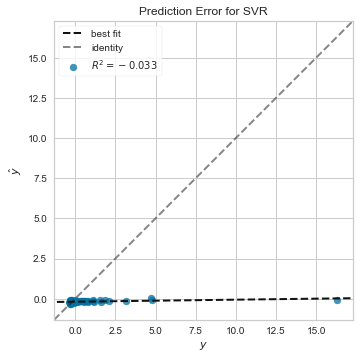

In [37]:
# Yellowbrick to visualize prediction error
from yellowbrick.regressor import prediction_error
visualizer = prediction_error(regressor, train_x_norm, train_y_norm, test_x_norm, test_y_norm)

### 1.5.1 Hyper parameter tuning with GridSearchCV

In [38]:
params = {'kernel' : ('linear', 'poly', 'rbf', 'sigmoid'),
         'C' : [1,5,10],
         'degree' : [3,8],
         'coef0' : [0.01,10,0.5],
         'gamma' : ('auto','scale')},


In [39]:
from sklearn.model_selection import GridSearchCV

In [40]:
grids = GridSearchCV(regressor, params)
grids.fit(train_x_norm, train_y_norm)

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='auto_deprecated', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='warn', n_jobs=None,
             param_grid=({'C': [1, 5, 10], 'coef0': [0.01, 10, 0.5],
                          'degree': [3, 8], 'gamma': ('auto', 'scale'),
                          'kernel': ('linear', 'poly', 'rbf', 'sigmoid')},),
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [41]:
grids.get_params()

{'cv': 'warn',
 'error_score': 'raise-deprecating',
 'estimator__C': 1.0,
 'estimator__cache_size': 200,
 'estimator__coef0': 0.0,
 'estimator__degree': 3,
 'estimator__epsilon': 0.1,
 'estimator__gamma': 'auto_deprecated',
 'estimator__kernel': 'rbf',
 'estimator__max_iter': -1,
 'estimator__shrinking': True,
 'estimator__tol': 0.001,
 'estimator__verbose': False,
 'estimator': SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
     gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
     tol=0.001, verbose=False),
 'iid': 'warn',
 'n_jobs': None,
 'param_grid': ({'kernel': ('linear', 'poly', 'rbf', 'sigmoid'),
   'C': [1, 5, 10],
   'degree': [3, 8],
   'coef0': [0.01, 10, 0.5],
   'gamma': ('auto', 'scale')},),
 'pre_dispatch': '2*n_jobs',
 'refit': True,
 'return_train_score': False,
 'scoring': None,
 'verbose': 0}

In [42]:
grids.best_estimator_

SVR(C=5, cache_size=200, coef0=0.01, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [43]:
grids.best_score_

0.0408361458453308

In [44]:
y_pred_norm = grids.predict(test_x_norm)

In [64]:
print('GridSearchCV: Performance metrics')
print('MAE:', mean_absolute_error(y_pred_norm, test_y_norm))
print('MSE:', mean_squared_error(y_pred_norm, test_y_norm))
print('Score:', grids.score(test_x_norm, test_y_norm))
print('R-Squared:', r2_score(y_pred_norm, test_y_norm))
print('RMSE:', np.sqrt(metrics.mean_absolute_error(y_pred_norm, test_y_norm)))

GridSearchCV: Performance metrics
MAE: 0.5292966799778821
MSE: 3.1773233600835145
Score: 0.03023214885023773
R-Squared: -110.83893565790584
RMSE: 0.7275277863957377


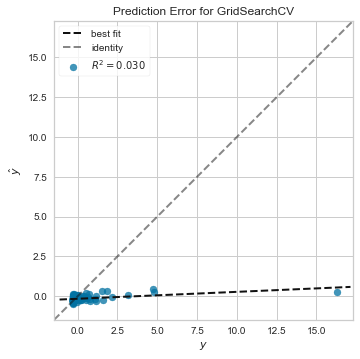

In [46]:
# Yellowbrick to visualize prediction error
from yellowbrick.regressor import prediction_error
visualizer = prediction_error(grids, train_x_norm, train_y_norm, test_x_norm, test_y_norm)

### 1.5.3 Hyperparameter Tuning with RandomizedSearchCV

In [49]:
from sklearn.model_selection import RandomizedSearchCV


param_dist = {  'C': [1000, 10000], 
                'kernel': ['linear']
             }

n_iter_search = 1


In [50]:

SVR_tuned_RS = RandomizedSearchCV(SVR (C=1), param_distributions = param_dist, scoring = 'r2', n_iter=n_iter_search)


In [51]:

SVR_tuned_RS.fit(train_x_norm, train_y_norm)

RandomizedSearchCV(cv='warn', error_score='raise-deprecating',
                   estimator=SVR(C=1, cache_size=200, coef0=0.0, degree=3,
                                 epsilon=0.1, gamma='auto_deprecated',
                                 kernel='rbf', max_iter=-1, shrinking=True,
                                 tol=0.001, verbose=False),
                   iid='warn', n_iter=1, n_jobs=None,
                   param_distributions={'C': [1000, 10000],
                                        'kernel': ['linear']},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring='r2', verbose=0)

In [54]:
SVR_tuned_RS.best_estimator_

SVR(C=1000, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='linear', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [55]:
SVR_tuned_RS.best_score_

-0.016210509129892355

In [56]:
y_pred_rs = SVR_tuned_RS.predict(test_x_norm)

In [52]:
# Best score and corresponding parameters.
print('best CV score from randomized search: {0:f}'.format(SVR_tuned_RS.best_score_))
print('corresponding parameters: {}'.format(SVR_tuned_RS.best_params_))

best CV score from randomized search: -0.016211
corresponding parameters: {'kernel': 'linear', 'C': 1000}


In [62]:
print('RandomizedSearchCV: Performance Metrics')
print('MAE:', mean_absolute_error(y_pred_rs, test_y_norm))
print('MSE:', mean_squared_error(y_pred_rs, test_y_norm))
print('Score:', grids.score(test_x_norm, test_y_norm))
print('R-Squared:', r2_score(y_pred_rs, test_y_norm))
print('RMSE:', np.sqrt(metrics.mean_absolute_error(y_pred_rs, test_y_norm)))

RandomizedSearchCV: Performance Metrics
MAE: 0.5422407223786949
MSE: 3.4242271994235134
Score: 0.03023214885023773
R-Squared: -2381.082579287966
RMSE: 0.7363699629796797


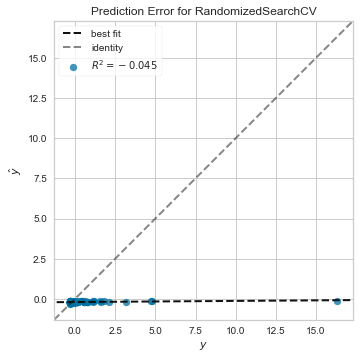

In [59]:
# Yellowbrick to visualize prediction error
from yellowbrick.regressor import prediction_error
visualizer = prediction_error(SVR_tuned_RS, train_x_norm, train_y_norm, test_x_norm, test_y_norm)

### 1.6 Feature Selection